In [2]:
# customer_country	        object	    982     국적 (범주형)
# com_reg_ver_win_rate	    float64	    44731   oppty 비율 (범주형)
# customer_type	            object	    43961   고객 유형 (범주형)
# historical_existing_cnt	float64	    45543   이전에 Converted 횟수 (수치형)

# id_strategic_ver	        float64	    55855   특정 사업부(Business Unit), 특정 사업 영역 가중치 (수치형)
# it_strategic_ver	        float64	    58178	특정 사업부(Business Unit), 특정 사업 영역 가중치 (수치형)
# idit_strategic_ver	    float64	    54734   위에 2개의 Feature중에 1값을 하나라도 가지면 1 (범주형)
# customer_job	            object	    18733   직업군 (범주형)
# inquiry_type	            object	    941     고객의 문의 유형 (범주형)

# product_category	        object	    19374   요청 제품 카테고리 (범주형)
# product_subcategory	    object	    50064   요청 제품 하위 카테고리 (범주형)
# product_modelname	        object	    50070   요정 제품 모델명 (범주형)
# customer_country.1	    object	    982     지역정보 (범주형)
# expected_timeline	        object	    30863   고객이 요청한 처리 일정 (수치형)

# ver_win_rate_x	        float64		40882   전체 Lead 중에서 Vertical을 기준으로 Vertical 수 비율 (수치형)
# ver_win_ratio_per_bu      float64	    43995   특정 Vertical Level1의 Business Unit 별 샘플 수 대비 영업 (수치형)
# business_area	            object	    40882	고객의 사업 영역 (범주형)
# business_subarea	        object	    53773	세부 사업 영역 (범주형)

In [4]:
import pandas as pd 

data_path = "/home/workspace/LGamiers/"
df = pd.read_csv(data_path + "train.csv") # 학습용 데이터


/tmp/ipykernel_236495/3767990559.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
train_missing= missing_values_table(df)
train_missing

Your selected dataframe has 29 columns.
There are 18 columns that have missing values.


,Missing Values,% of Total Values
it_strategic_ver,58178,98.1
id_strategic_ver,55855,94.2
idit_strategic_ver,54734,92.3
business_subarea,53773,90.7
product_modelname,50070,84.4
product_subcategory,50064,84.4
historical_existing_cnt,45543,76.8
com_reg_ver_win_rate,44731,75.4
ver_win_ratio_per_bu,43995,74.2
customer_type,43961,74.1


<Axes: >

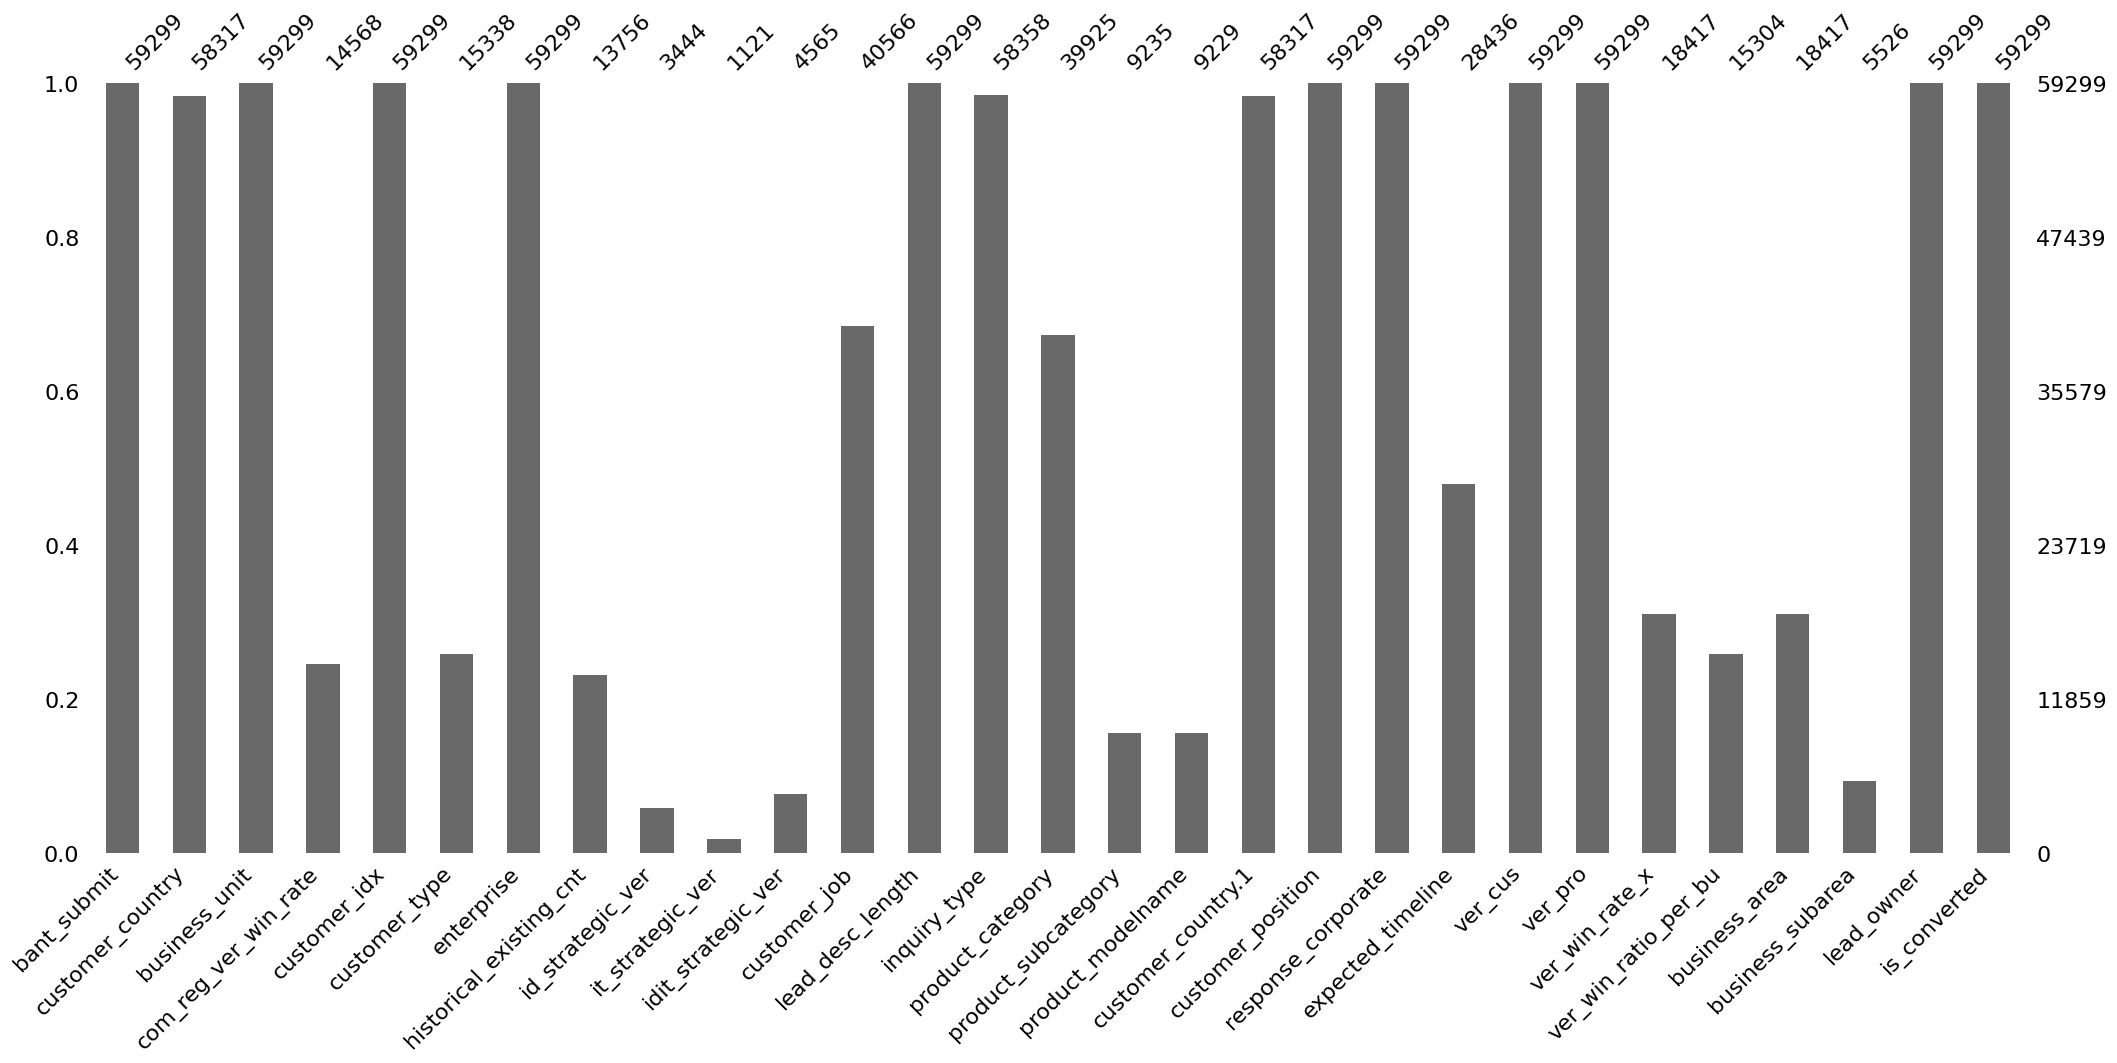

In [9]:
import missingno as msno

msno.bar(df)

<Axes: >

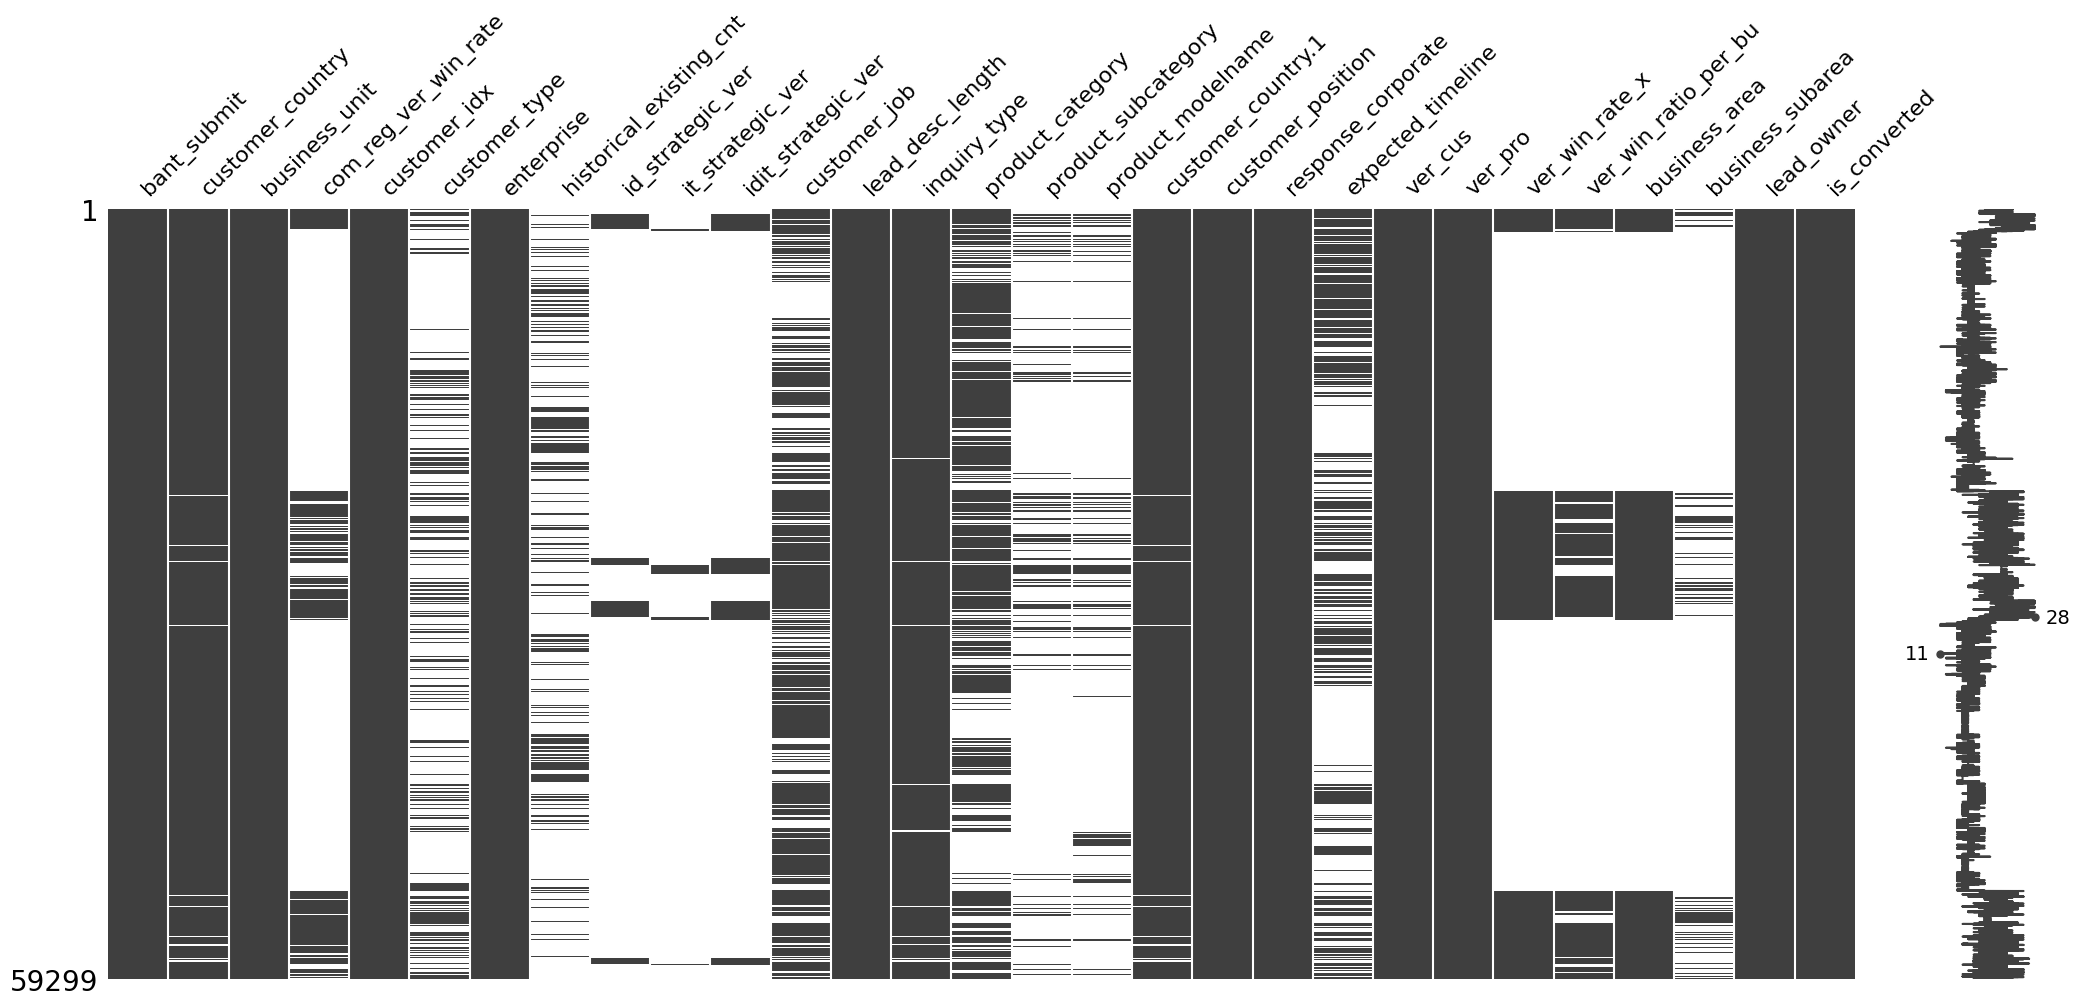

In [14]:
msno.matrix(df)

<Axes: >

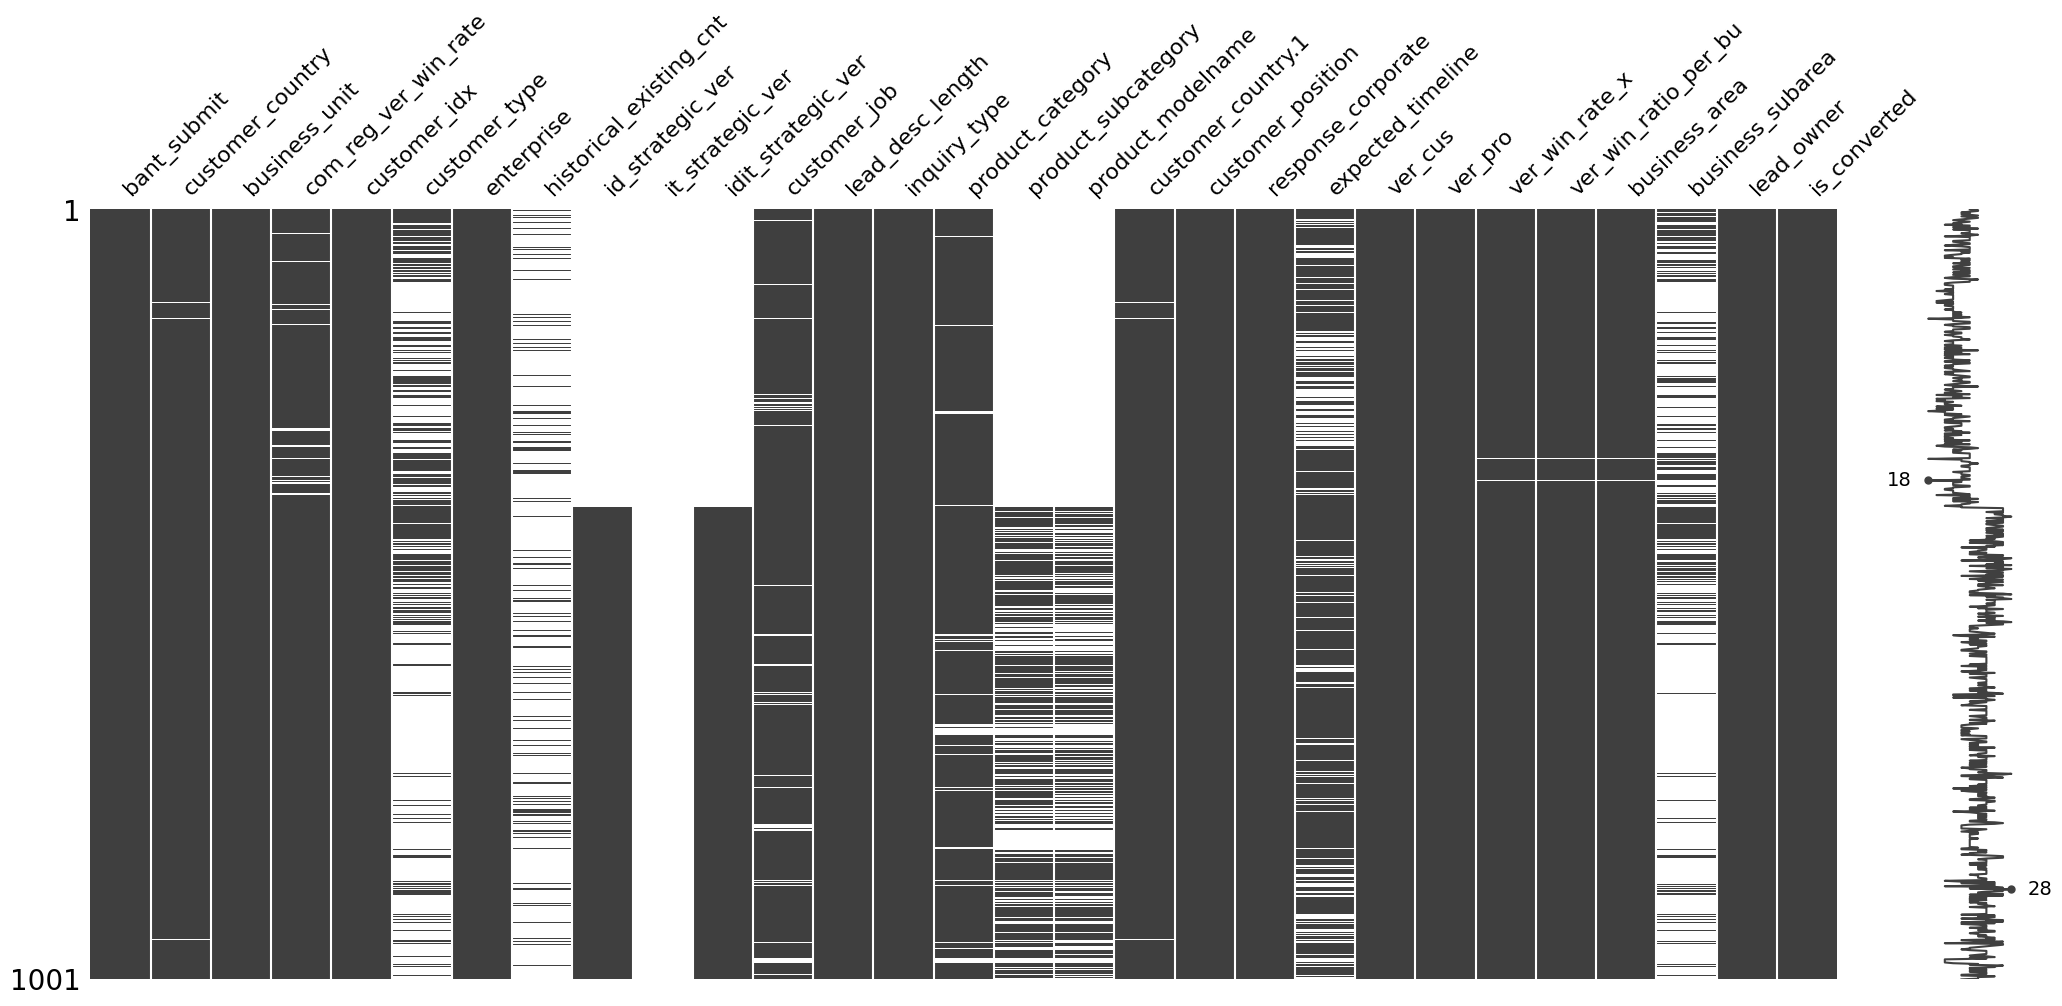

In [13]:
# sample 어디에 비여있는지 알려준다. 

msno.matrix(df.loc[:1000])

In [16]:
# Missing Completely at Random (MCAR): 그냥 랜덤
# Missing at Random (MAR): 다른 Feature의 complete data 연관되어져있다. 
# Missing Not at Random (MNAR): 관찰되어있지않은 데이터와 연관 


# sort로 연관성 찾기
# msno.heatmap(df)
